<a href="https://colab.research.google.com/github/muscak/Master-Machine-Learning-Algorithms/blob/master/Ensemble-Algorithms/Bagging/Bagged_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bagged Decision Trees

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction [1].

## Table of Contents

1. [Introduction](#intro)
2. [Import Libraries](#libraries)
3. [Sample Dataset](#sample)
4. [Manual Implementation](#manual)
5. [Using Sklearn Library](#sklearn)
6. [Iris Dataset](#iris)
7. [Conclusion](#conclusion)

## 1. Introduction<a id='intro'></a>

## 2. Import Libraries<a id='libraries'></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')
from sklearn.datasets import make_circles
from statistics import mode # will be used for prediction

## 3. Sample Dataset<a id='sample'></a>

The dataset contains two input variables ($x_1$ and $x_2$) and the class output variable with the values 0 and 1. The dataset contains 10 records, 5 that belong to each class.

In [2]:
x1 = [2.309572387, 1.500958319, 3.107545266, 4.090032824, 5.38660215, 
      6.451823468, 6.633669528, 8.749958452, 4.589131161, 6.619322828]
x2 = [1.168959634, 2.535482186, 2.162569456, 3.123409313, 2.109488166, 
      0.242952387, 2.749508563, 2.676022211, 0.925340325, 3.831050828]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

df_sample = pd.DataFrame(zip(x1, x2, y), columns=['x1', 'x2', 'y'])
df_sample

,x1,x2,y
0,2.309572,1.168960,0
1,1.500958,2.535482,0
2,3.107545,2.162569,0
3,4.090033,3.123409,0
4,5.386602,2.109488,0
5,6.451823,0.242952,1
6,6.633670,2.749509,1
7,8.749958,2.676022,1
8,4.589131,0.925340,1
9,6.619323,3.831051,1


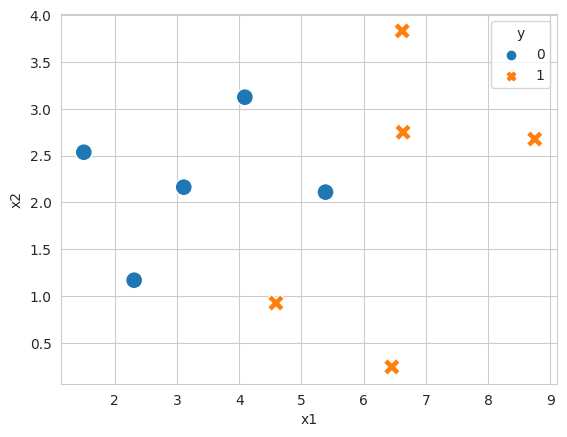

In [3]:
# Distribution of the data for each class
sb.scatterplot(data=df_sample, x='x1', y='x2', hue='y', style='y', s=150)
plt.show()

## 4. Manual Implementation<a id='manual'></a>

We will create 3 decision trees from the training data, each with below a usual or normal level of accuracy score.

In [4]:
# Define the function that creates the mode by using the split point 
def create_model(df, split, feature):
  df['Group'] = ''
  df['Prediction'] = ''
  df['Error'] = ''
  right = -1
  left = -1
  
  df.loc[df[feature] <= split, 'Group'] = 'LEFT'
  df.loc[df[feature] > split, 'Group'] = 'RIGHT'

  if df[(df['Group'] == 'RIGHT')].mode().loc[0, 'Group'] == 'RIGHT' and df[(df['Group'] == 'RIGHT')].mode().loc[0, 'y'] == 0:
    right = 0
    left = 1
  if df[(df['Group'] == 'RIGHT')].mode().loc[0, 'Group'] == 'RIGHT' and df[(df['Group'] == 'RIGHT')].mode().loc[0, 'y'] == 1:
    right = 1
    left = 0
  if df[(df['Group'] == 'RIGHT')].mode().loc[0, 'Group'] == 'LEFT' and df[(df['Group'] == 'RIGHT')].mode().loc[0, 'y'] == 0:
    right = 1
    left = 0
  if df[(df['Group'] == 'RIGHT')].mode().loc[0, 'Group'] == 'LEFT' and df[(df['Group'] == 'RIGHT')].mode().loc[0, 'y'] == 1:
    right = 0
    left = 1
  
  df.loc[df['Group'] == 'LEFT', 'Prediction'] = left
  df.loc[df['Group'] == 'RIGHT', 'Prediction'] = right

  df.loc[df['y'] == df['Prediction'], 'Error'] = 0
  df.loc[df['y'] != df['Prediction'], 'Error'] = 1

  acc = (1 - (df['Error'].sum() / len(df))) * 100

  return df, acc

In [5]:
# Copy the data into new dataframe
df = df_sample.copy()

# Define different split points
split1 = {'split': df.loc[4, 'x1'], 'feature':'x1'}
split2 = {'split': df.loc[3, 'x1'], 'feature':'x1'}
split3 = {'split': df.loc[8, 'x2'], 'feature':'x2'}
splits = [split1, split2, split3]

# Create an array to store the accuracy scores for each split point
accArray = []

# Create a new dataframe to store the model parameters based on all split points
df_new = pd.DataFrame(columns=['x1', 'x2', 'y', 'Group', 'Prediction', 'Error'])
for i in range(len(splits)):
  df_temp, acc = create_model(df, splits[i]['split'], splits[i]['feature'])
  df_new = pd.concat([df_new, df_temp], ignore_index=True)
  accArray.append(acc)
df_new

,x1,x2,y,Group,Prediction,Error
0,2.309572,1.168960,0,LEFT,0,0
1,1.500958,2.535482,0,LEFT,0,0
2,3.107545,2.162569,0,LEFT,0,0
3,4.090033,3.123409,0,LEFT,0,0
4,5.386602,2.109488,0,LEFT,0,0
5,6.451823,0.242952,1,RIGHT,1,0
6,6.633670,2.749509,1,RIGHT,1,0
7,8.749958,2.676022,1,RIGHT,1,0
8,4.589131,0.925340,1,LEFT,0,1
9,6.619323,3.831051,1,RIGHT,1,0


In [6]:
accArray

[90.0, 90.0, 70.0]

### Prediction

In [7]:
df_sample['Prediction'] = ''
df_sample['Error'] = ''

for i in range(len(df_sample)):
    prediction = mode([df_new.loc[i, 'Prediction'], df_new.loc[i + len(df_sample), 'Prediction'], 
                       df_new.loc[i + (len(df_sample)*2), 'Prediction']])
    df_sample.loc[i, 'Prediction'] = prediction
df_sample.loc[df_sample['y'] == df_sample['Prediction'], 'Error'] = 0
df_sample.loc[df_sample['y'] != df_sample['Prediction'], 'Error'] = 1

df_sample

,x1,x2,y,Prediction,Error
0,2.309572,1.168960,0,0,0
1,1.500958,2.535482,0,0,0
2,3.107545,2.162569,0,0,0
3,4.090033,3.123409,0,0,0
4,5.386602,2.109488,0,0,0
5,6.451823,0.242952,1,1,0
6,6.633670,2.749509,1,1,0
7,8.749958,2.676022,1,1,0
8,4.589131,0.925340,1,1,0
9,6.619323,3.831051,1,1,0


In [8]:
acc = (1 - (df_sample['Error'].sum() / len(df_sample))) * 100
print('Accuracy: ', acc, '%')

Accuracy:  100.0 %


### Another Sample Data

As you can see the proposed algorithm predicts the labels with 100% accuracy score for the sample dataset. We'll create a new dataset using the `make_circles` with 10% of `noise` to spice things up and check the performance of the Bagged Decision Tree algorithm. The dataset contains two input variables ($x_1$ and $x_2$) and the class output variable with the values 0 and 1. The dataset contains 100 records, 50 that belong to each class.

In [9]:
x, y = make_circles(
    n_samples=100, # 100 observations 
    random_state=101, # if you want the same results as mine
    noise=0.1
)

# Turn it into dataframe
df_new_sample = pd.DataFrame(zip(x[:,0], x[:,1], y), columns=['x1', 'x2', 'y'])
df_new_sample.head()

,x1,x2,y
0,-0.489114,0.856099,0
1,0.827368,0.179709,0
2,0.516329,-0.807108,0
3,-0.365443,0.636141,1
4,-0.032702,-0.660047,1


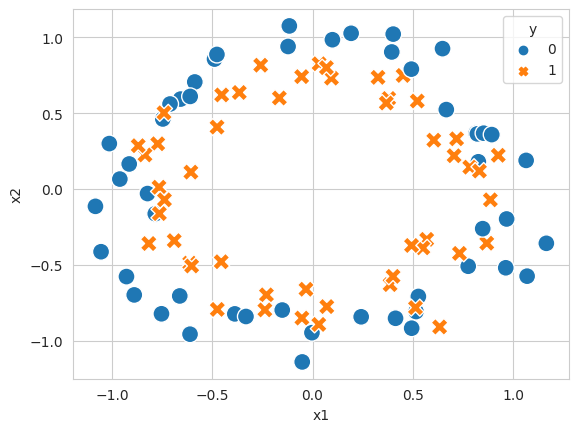

In [10]:
sb.scatterplot(data=df_new_sample, x='x1', y='x2', hue='y', style='y', s=150)
plt.show()

In [11]:
df_new_sample.describe()

,x1,x2,y
count,100.000000,100.000000,100.000000
mean,0.011240,-0.008504,0.500000
std,0.646851,0.627636,0.502519
min,-1.083362,-1.138920,0.000000
25%,-0.610774,-0.575471,0.000000
50%,0.014062,0.038997,0.500000
75%,0.555332,0.570122,1.000000
max,1.166711,1.074709,1.000000


In [25]:
# Copy the data into new dataframe
df = df_new_sample.copy()

# Define different split points
split1 = {'split': df_new_sample.loc[4, 'x1'], 'feature':'x1'}
split2 = {'split': df_new_sample.loc[3, 'x1'], 'feature':'x1'}
split3 = {'split': df_new_sample.loc[8, 'x2'], 'feature':'x2'}
splits = [split1, split2, split3]

# Create an array to store the accuracy scores for each split point
accArray = []

# Create a new dataframe to store the model parameters based on all split points
df_new = pd.DataFrame(columns=['x1', 'x2', 'y', 'Group', 'Prediction', 'Error'])
for i in range(len(splits)):
  df_temp, acc = create_model(df, splits[i]['split'], splits[i]['feature'])
  df_new = pd.concat([df_new, df_temp], ignore_index=True)
  accArray.append(acc)
df_new

,x1,x2,y,Group,Prediction,Error
0,-0.489114,0.856099,0,LEFT,0,0
1,0.827368,0.179709,0,RIGHT,1,1
2,0.516329,-0.807108,0,RIGHT,1,1
3,-0.365443,0.636141,1,LEFT,0,1
4,-0.032702,-0.660047,1,LEFT,0,1
...,...,...,...,...,...,...
295,0.069168,0.799748,1,RIGHT,0,1
296,-0.741245,0.502296,1,LEFT,1,0
297,-0.455790,-0.478902,1,LEFT,1,0
298,0.192513,1.026008,0,RIGHT,0,0


In [26]:
accArray

[51.0, 53.0, 51.0]

### Predicting using new sample dataset

In [27]:
df_new_sample['Prediction'] = ''
df_new_sample['Error'] = ''

for i in range(len(df_new_sample)):
    prediction = mode([df_new.loc[i, 'Prediction'], df_new.loc[i + len(df_new_sample), 'Prediction'], 
                       df_new.loc[i + (len(df_new_sample)*2), 'Prediction']])
    df_new_sample.loc[i, 'Prediction'] = prediction
df_new_sample.loc[df_new_sample['y'] == df_new_sample['Prediction'], 'Error'] = 0
df_new_sample.loc[df_new_sample['y'] != df_new_sample['Prediction'], 'Error'] = 1

df_new_sample

,x1,x2,y,Prediction,Error
0,-0.489114,0.856099,0,0,0
1,0.827368,0.179709,0,1,1
2,0.516329,-0.807108,0,1,1
3,-0.365443,0.636141,1,0,1
4,-0.032702,-0.660047,1,1,0
...,...,...,...,...,...
95,0.069168,0.799748,1,1,0
96,-0.741245,0.502296,1,0,1
97,-0.455790,-0.478902,1,0,1
98,0.192513,1.026008,0,1,1


In [28]:
acc = (1 - (df_new_sample['Error'].sum() / len(df_new_sample))) * 100
print('Accuracy: ', acc, '%')

Accuracy:  52.0 %


🔎 **Observation:** As you can see the performance of the algorithm is worse on this dataset. Let's increase the number of split points and see if it will have positive impact on the performance.

In [38]:
import random

# Copy the data into new dataframe
df = df_new_sample.copy()

# Generate random split points
splits = []
for i in range(10):
  rand_index = random.randint(0, 99)
  feature = 'x'+str(random.randint(1, 2))

  split = {'split': df_new_sample.loc[rand_index, feature], 'feature':feature}
  splits.append(split)

# Create an array to store the accuracy scores for each split point
accArray = []

# Create a new dataframe to store the model parameters based on all split points
df_new = pd.DataFrame(columns=['x1', 'x2', 'y', 'Group', 'Prediction', 'Error'])
for i in range(len(splits)):
  df_temp, acc = create_model(df, splits[i]['split'], splits[i]['feature'])
  df_new = pd.concat([df_new, df_temp], ignore_index=True)
  accArray.append(acc)
df_new

,x1,x2,y,Group,Prediction,Error
0,-0.489114,0.856099,0,LEFT,1,1
1,0.827368,0.179709,0,RIGHT,0,0
2,0.516329,-0.807108,0,RIGHT,0,0
3,-0.365443,0.636141,1,LEFT,1,0
4,-0.032702,-0.660047,1,LEFT,1,0
...,...,...,...,...,...,...
995,0.069168,0.799748,1,RIGHT,1,0
996,-0.741245,0.502296,1,LEFT,0,1
997,-0.455790,-0.478902,1,LEFT,0,1
998,0.192513,1.026008,0,RIGHT,1,1


In [39]:
accArray

[54.0,
 53.0,
 53.0,
 53.0,
 57.00000000000001,
 56.00000000000001,
 57.00000000000001,
 53.0,
 54.0,
 51.0]

In [40]:
df_new_sample['Prediction'] = ''
df_new_sample['Error'] = ''

for i in range(len(df_new_sample)):
    prediction = mode([df_new.loc[i, 'Prediction'], df_new.loc[i + len(df_new_sample), 'Prediction'], 
                       df_new.loc[i + (len(df_new_sample)*2), 'Prediction']])
    df_new_sample.loc[i, 'Prediction'] = prediction
df_new_sample.loc[df_new_sample['y'] == df_new_sample['Prediction'], 'Error'] = 0
df_new_sample.loc[df_new_sample['y'] != df_new_sample['Prediction'], 'Error'] = 1

df_new_sample

,x1,x2,y,Prediction,Error
0,-0.489114,0.856099,0,1,1
1,0.827368,0.179709,0,1,1
2,0.516329,-0.807108,0,0,0
3,-0.365443,0.636141,1,1,0
4,-0.032702,-0.660047,1,1,0
...,...,...,...,...,...
95,0.069168,0.799748,1,1,0
96,-0.741245,0.502296,1,1,0
97,-0.455790,-0.478902,1,1,0
98,0.192513,1.026008,0,1,1


In [41]:
acc = (1 - (df_new_sample['Error'].sum() / len(df_new_sample))) * 100
print('Accuracy: ', acc, '%')

Accuracy:  55.00000000000001 %


🔎 **Observation:** As you can see we increased the number of split points into 10 randomly selecting indexes from the dataset. What we aimed is to try to increase number the correctly predicted values so it will have impact on the overall accuracy as the algorithm generates predictions by taking the mode of all predictions for that specific data point. It had a slight impact on the performance.

## 5. Using Sklearn Library<a id='sklearn'></a>

In [52]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [48]:
x = df_new_sample.drop('y', axis=1)
y = df_new_sample['y']
model = BaggingClassifier()
model.fit(x, y)

y_hat = model.predict(x)

acc = accuracy_score(y, y_hat) * 100
print('Accuracy: {:.2f}%'.format(acc))

Accuracy: 100.00%


🔎 **Observation:**

## 6. Iris Dataset<a id='iris'></a>

We'll classify the flowers in the wellknown Iris dataset using `BaggingClassifier` from `sklearn` library.

In [42]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


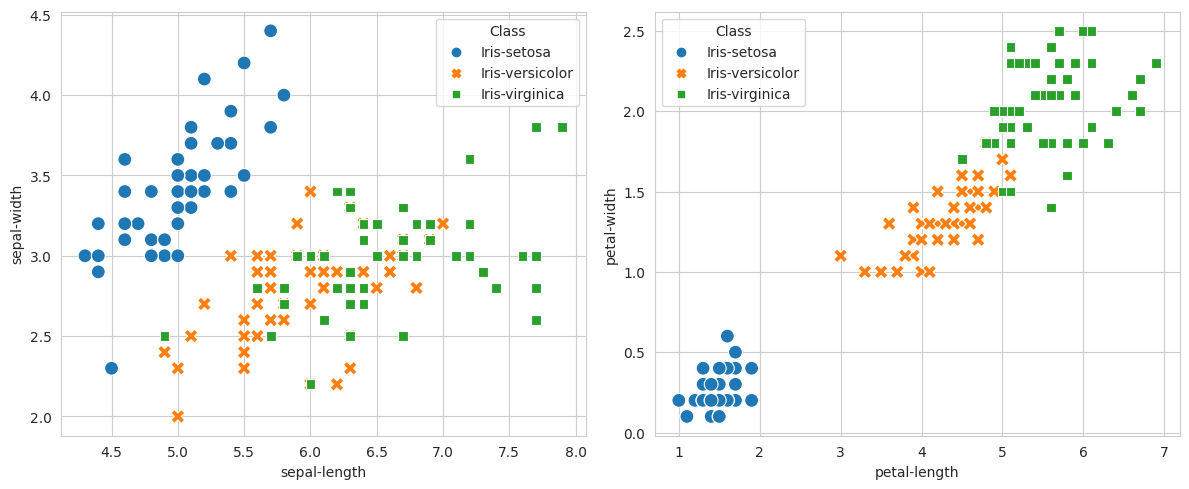

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sb.scatterplot(data=dataset, x='sepal-length', y='sepal-width', hue='Class', style='Class', s=100, ax=axes[0])
sb.scatterplot(data=dataset, x='petal-length', y='petal-width', hue='Class', style='Class', s=100, ax=axes[1])
plt.tight_layout()
plt.show()

In [44]:
dataset['Class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

In [45]:
# Replace the string labels with numeric values
dataset.replace({'Class':{'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}}, inplace=True)

In [46]:
from sklearn.model_selection import train_test_split

In [50]:
x = dataset.drop('Class', axis=1)
y = dataset['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [51]:
model = BaggingClassifier()
model.fit(x_train, y_train)

y_hat = model.predict(x_test)

acc = accuracy_score(y_test, y_hat) * 100
print('Accuracy: {:.2f}%'.format(acc))

Accuracy: 93.33%


In [53]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.86      1.00      0.92        12
           2       1.00      0.75      0.86         8

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30



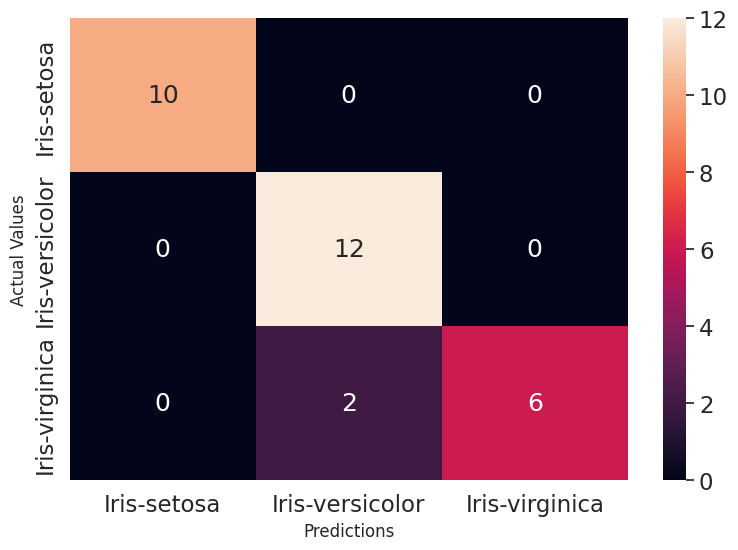

In [54]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_hat)
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
pred_labels = [l for l in labels]
cm_df = pd.DataFrame(cm, index=labels, columns=pred_labels)

sb.set(font_scale=1.5)
plt.figure(figsize=(9,6))
sb.heatmap(cm_df, annot=True, fmt='d')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actual Values', fontsize=12)
plt.show()

## 7. Conclusion<a id='conclusion'></a>

## References
---

[1] [sklearn.ensemble.BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)